# 라이브러리 임포트

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.5f}'.format) # 부동 소수점 출력 형식

import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')

# 마이너스 기호 표시 설정
plt.rcParams['axes.unicode_minus'] = False

In [2]:
from ml import preprocessing

# 데이터 로드

In [3]:
# fname = '../datasets/dataset_final_240201.csv'

# ELS + 장단기, 2015년
fname = 'dataset_final_240201.csv'

data = pd.read_csv(fname, index_col=0)
data.shape

(1750, 556)

In [4]:
# els 피처 전처리
# 데이터 타입 변경 및 불필요 컬럼 제거
dataset = preprocessing.preprocessing_els(data)

In [5]:
dataset.shape

(1750, 528)

In [6]:
dataset.columns

Index(['차수', '상환조건(%)', '하한 수준(%)', '기초자산개수', 'label', '녹인발생차수_차이',
       '상환조건감소량(%)_prev', '상환조건감소량(%)_next', '녹인대비상환수준(%)', '환매일 수준(%)',
       ...
       '일일증권평균거래량_Main Board_Other listed securities_shift',
       '일일증권평균거래량_Main Board_Sub-total_shift', '홍콩 M2 (2).1(%)_shift',
       '홍콩직접투자(%)_shift', '홍콩직접투자(%)_shift.1', '홍콩파생상품(%)_shift',
       '일일증권평균거래량_Main Board_Other equity stocks(%)_shift',
       '홍콩거래소시가총액_Main BoardH Shares(%)_shift', '국채 수익률', '국채 수익률증감'],
      dtype='object', length=528)

In [347]:
dataset = dataset[dataset['차수'] == 5]
# dataset2의 'label' 열에서 0을 2로, 1을 0으로, 2를 1로 매핑
dataset['label'] = dataset['label'].map({0: 2, 1: 0})

# 다시 2를 1로 매핑
dataset['label'] = dataset['label'].replace({2: 1})
dataset.drop('차수', axis=1 , inplace= True)

In [348]:
dataset.shape

(266, 527)

In [349]:
# 값이 하나인 피처 삭제

cols_unique = []
dtypes = {}

for col in dataset.columns:
    dtypes[col] = dataset[col].dtype
    if len(dataset[col].unique())==1:
        cols_unique.append(col)

In [350]:
len(cols_unique)

105

In [351]:
dataset = dataset.drop(columns = cols_unique)
dataset.shape

(266, 422)

In [352]:
dataset.columns[:20]

Index(['상환조건(%)', '하한 수준(%)', '기초자산개수', 'label', '상환조건감소량(%)_prev',
       '상환조건감소량(%)_next', '녹인대비상환수준(%)', '환매일 수준(%)', '환매대비상환수준(%)',
       '환매대비상환수준(%)_next', '환매일종가위치_code', 'H총증감률(%)', 'H평균증감률(%)',
       'H일평균증감률(%)', 'H이전대비증감률(%)', '상환비율(%)', '변동_diff', 'Dubai_diff',
       'Brent_diff', 'WTI_diff'],
      dtype='object')

In [353]:
# 범주형 변수 추출 -> cols_cate
# int형이고 unique 값이 2개인 더미변수

cols_cate = ['차수', '녹인발생차수_차이', '환매일종가위치_code']
for col in dataset.columns:
    if col=='label': continue
    if all(dataset[col] == dataset[col].astype(int)) and len(dataset[col].unique())==2:
        cols_cate.append(col)

In [354]:
cols_cate

['차수',
 '녹인발생차수_차이',
 '환매일종가위치_code',
 '기초자산개수',
 '환매일종가위치_code',
 'CLI_ZAF_dummy_diff',
 'kor_cci_100기준_shift_diff',
 '홍콩 M1 자국통화_shift_diff',
 '홍콩 M1 외국통화.1_shift_diff',
 '홍콩 M1 종합_shift_diff',
 '홍콩 M1 (seasonally adjusted)_shift_diff',
 '홍콩 M2 자국통화_shift_diff',
 '홍콩 M2 외국통화.1_shift_diff',
 '홍콩 M2 종합_shift_diff',
 '홍콩 M2 (adjusted for foreign currency swap deposits)_shift_diff',
 '홍콩 M2 (adjusted for foreign currency swap deposits).1_shift_diff',
 '홍콩 M2 (adjusted for foreign currency swap deposits).2_shift_diff',
 '홍콩 M3 자국통화_shift_diff',
 '홍콩 M3 외국통화.1_shift_diff',
 '홍콩 M3 종합_shift_diff',
 '홍콩 M3 (adjusted for foreign currency swap deposits)_shift_diff',
 '홍콩 M3 (adjusted for foreign currency swap deposits).1_shift_diff',
 '홍콩 M3 (adjusted for foreign currency swap deposits).2_shift_diff',
 '홍콩금융계좌_shift_diff',
 '홍콩금융예비자산_shift_diff',
 '홍콩직접투자_shift_diff',
 '홍콩직접투자자산_shift_diff',
 '홍콩직접투자부채_shift_diff',
 '홍콩직접투자_shift.1_diff',
 '홍콩포트폴리오투자자산_shift_diff',
 '홍콩포트폴리오투자부채_shift_diff',
 

In [355]:
cols_y = ['label']

cols_cont = list(
    set(dataset.columns) - set(cols_y) - set(cols_cate)
)
len(dataset.columns), len(cols_y), len(cols_cate), len(cols_cont)

(422, 1, 76, 348)

# 데이터 전처리

In [356]:
dataset[cols_cont].boxplot()

<Axes: >

In [357]:
# train test split
X = dataset.drop(columns = ['label'])
y = dataset['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
      X, y,
      test_size=0.2, 
      random_state=42,
      stratify=y
    )

print(X.shape, y.shape)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
print(y_train.mean(), y_test.mean())

(266, 421) (266,)
(212, 421) (54, 421)
(212,) (54,)
0.3490566037735849 0.35185185185185186


In [358]:
X_train.describe()

,상환조건(%),하한 수준(%),기초자산개수,상환조건감소량(%)_prev,상환조건감소량(%)_next,녹인대비상환수준(%),환매일 수준(%),환매대비상환수준(%),환매대비상환수준(%)_next,환매일종가위치_code,...,일일증권평균거래량_Main Board_Other listed securities_shift,일일증권평균거래량_Main Board_Sub-total_shift,홍콩 M2 (2).1(%)_shift,홍콩직접투자(%)_shift,홍콩직접투자(%)_shift.1,홍콩파생상품(%)_shift,일일증권평균거래량_Main Board_Other equity stocks(%)_shift,홍콩거래소시가총액_Main BoardH Shares(%)_shift,국채 수익률,국채 수익률증감
count,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,...,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000
mean,84.11321,57.62736,2.31604,2.09906,0.67453,25.81132,79.83996,4.27325,3.59872,1.91038,...,21418.17453,88330.39623,0.44594,-0.17061,-0.41422,1.80725,1.14566,1.16639,2.32000,0.00311
std,2.71671,2.57546,0.46603,2.37973,1.63571,4.25850,3.21508,3.63955,4.12952,0.28632,...,1421.79269,6993.51299,0.08929,0.04457,2.34110,1.45641,0.52915,0.65989,0.06238,0.02894
min,75.00000,55.00000,2.00000,-0.00000,0.00000,15.00000,74.51286,-5.51652,-10.51652,1.00000,...,19134.00000,77095.00000,0.39062,-0.19822,-1.86457,0.90498,0.29557,0.75758,2.17000,-0.05000
25%,84.00000,55.00000,2.00000,-0.00000,0.00000,23.00000,77.97647,1.47498,1.32444,2.00000,...,19134.00000,77095.00000,0.39062,-0.19822,-1.86457,0.90498,0.29557,0.75758,2.31000,-0.01250
50%,85.00000,58.50000,2.00000,-0.00000,0.00000,25.00000,79.36455,4.40557,3.39273,2.00000,...,22299.00000,92663.00000,0.39062,-0.19822,-1.86457,0.90498,1.47348,0.75758,2.33000,0.00000
75%,85.00000,60.00000,3.00000,5.00000,0.00000,30.00000,82.26782,6.63978,6.33910,2.00000,...,22299.00000,92663.00000,0.58939,-0.09901,3.34686,4.14703,1.47348,2.22652,2.37000,0.02000
max,90.00000,62.00000,3.00000,5.00000,5.00000,35.00000,87.35042,14.08316,11.98437,2.00000,...,22299.00000,92663.00000,0.58939,-0.09901,3.34686,4.14703,1.47348,2.22652,2.46000,0.07000


In [359]:
# 스케일링

X_train_scaled, X_test_scaled = preprocessing.scaling(
    X_train, X_test, cols_cont
)
X_train_scaled.describe()

,상환조건(%),하한 수준(%),기초자산개수,상환조건감소량(%)_prev,상환조건감소량(%)_next,녹인대비상환수준(%),환매일 수준(%),환매대비상환수준(%),환매대비상환수준(%)_next,환매일종가위치_code,...,일일증권평균거래량_Main Board_Other listed securities_shift,일일증권평균거래량_Main Board_Sub-total_shift,홍콩 M2 (2).1(%)_shift,홍콩직접투자(%)_shift,홍콩직접투자(%)_shift.1,홍콩파생상품(%)_shift,일일증권평균거래량_Main Board_Other equity stocks(%)_shift,홍콩거래소시가총액_Main BoardH Shares(%)_shift,국채 수익률,국채 수익률증감
count,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,...,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000,212.00000
mean,0.00000,-0.00000,2.31604,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,1.91038,...,21418.17453,88330.39623,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000
std,1.00237,1.00237,0.46603,1.00237,1.00237,1.00237,1.00237,1.00237,1.00237,0.28632,...,1421.79269,6993.51299,1.00237,1.00237,1.00237,1.00237,1.00237,1.00237,1.00237,1.00237
min,-3.36245,-1.02257,2.00000,-0.88414,-0.41335,-2.54477,-1.66083,-2.69619,-3.42622,1.00000,...,19134.00000,77095.00000,-0.62098,-0.62098,-0.62098,-0.62098,-1.61035,-0.62098,-2.41039,-1.83949
25%,-0.04177,-1.02257,2.00000,-0.88414,-0.41335,-0.66173,-0.58098,-0.77067,-0.55204,2.00000,...,19134.00000,77095.00000,-0.62098,-0.62098,-0.62098,-0.62098,-1.61035,-0.62098,-0.16069,-0.54074
50%,0.32719,0.33963,2.00000,-0.88414,-0.41335,-0.19097,-0.14822,0.03644,-0.05000,2.00000,...,22299.00000,92663.00000,-0.62098,-0.62098,-0.62098,-0.62098,0.62098,-0.62098,0.16069,-0.10782
75%,0.32719,0.92343,3.00000,1.22191,-0.41335,0.98593,0.75694,0.65177,0.66518,2.00000,...,22299.00000,92663.00000,1.61035,1.61035,1.61035,1.61035,0.62098,1.61035,0.80346,0.58485
max,2.17202,1.70183,3.00000,1.22191,2.65065,2.16283,2.34154,2.70174,2.03547,2.00000,...,22299.00000,92663.00000,1.61035,1.61035,1.61035,1.61035,0.62098,1.61035,2.24970,2.31651


In [317]:
# # 범주형 변수 boxplot
# X_train[cols_cate].boxplot()
# plt.xticks(rotation=90)
# plt.show()

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

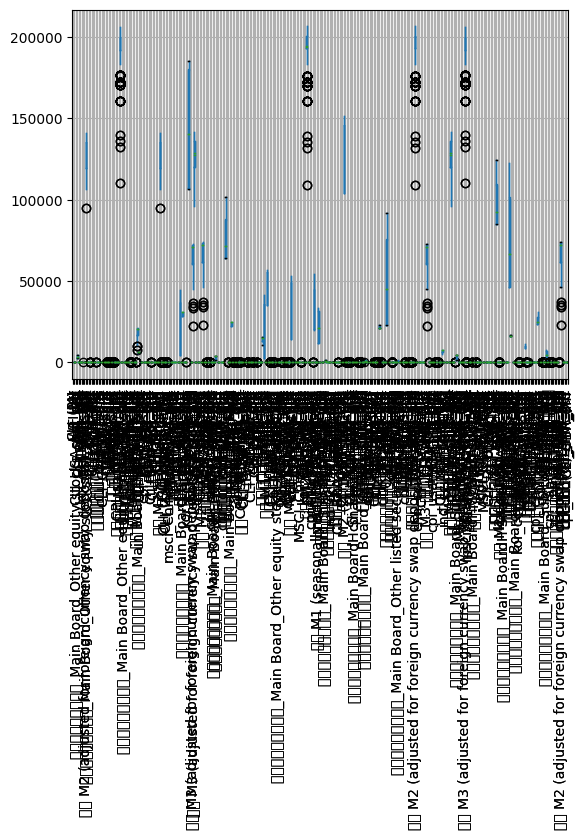

In [249]:
# 연속형 변수 boxplot
X_train[cols_cont].boxplot(figsize=(100, 10))
plt.xticks(rotation=90)
plt.show()

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

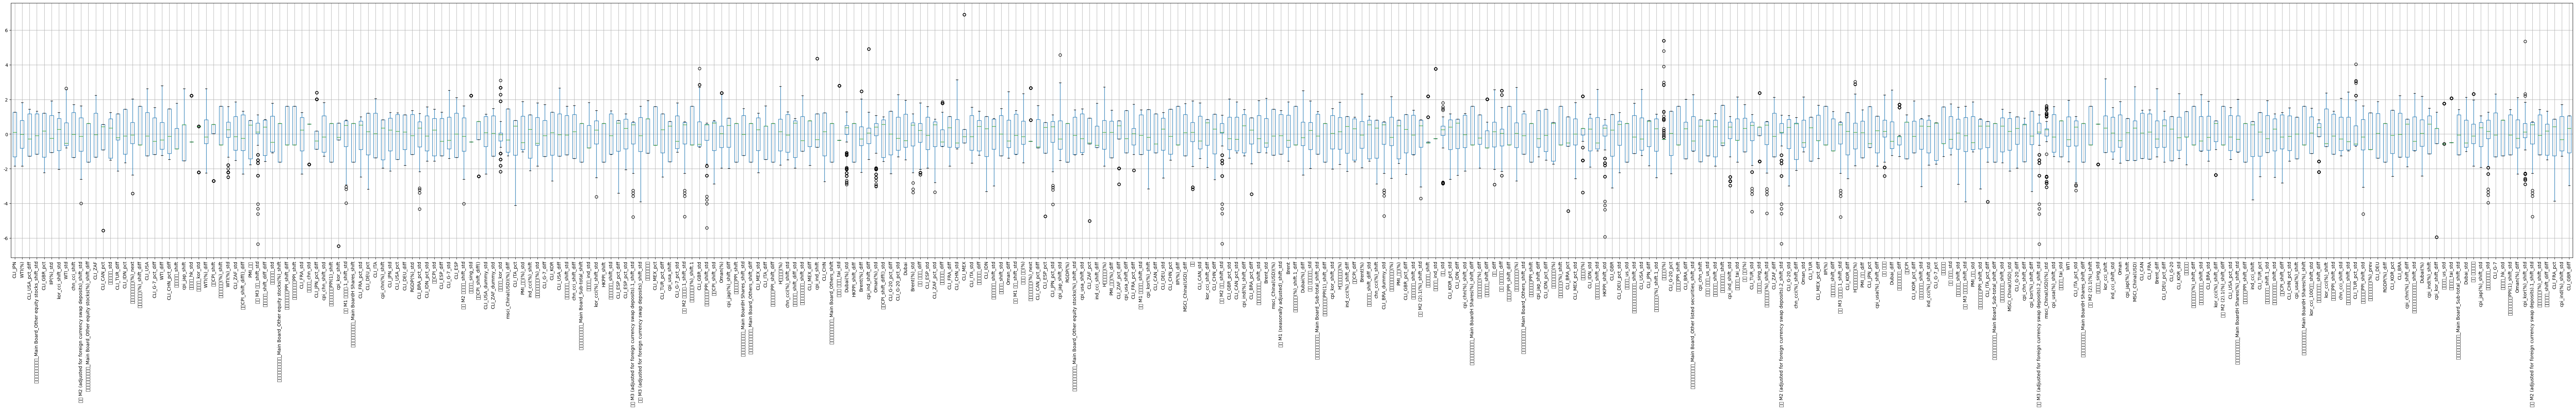

In [250]:
# 연속형 변수 scaling boxplot
X_train_scaled[cols_cont].boxplot(figsize=(100, 10))
plt.xticks(rotation=90)
plt.show()

In [273]:
X_train.shape

(212, 421)

In [252]:
# 피처셀렉션
from ml import feature_selection

methods = [
    'lr', 
    # 'dt', 'svc', 'rf', 'xgb', 'lgbm'
]

features = {}
for method in methods:
    print(method)

    # print("FEATURE SELECTION : (1) forward")
    features_forward = feature_selection.forward(
        X_train_scaled, X_test_scaled, y_train, y_test,
        method=method
    )
    # print()

    # print("FEATURE SELECTION : (2) backward")
    features_backward = feature_selection.backward(
        X_train_scaled, X_test_scaled, y_train, y_test,
        method=method
    )
    # print()

    # print("FEATURE SELECTION : (3) stepwise")
    features_stepwise = feature_selection.stepwise(
        X_train_scaled, X_test_scaled, y_train, y_test,
        method=method
    )
    # print()

    feature_cnt = pd.DataFrame([], index = X_train_scaled.columns)
    feature_cnt.loc[features_forward, 'forward'] = 1
    feature_cnt.loc[features_backward, 'backward'] = 1
    feature_cnt.loc[features_stepwise, 'stepwise'] = 1
    feature_cnt = feature_cnt.fillna(0)
    feature_cnt['Total'] = feature_cnt.sum(axis=1)
    feature_cnt = feature_cnt.astype('int')
    feature_cnt = feature_cnt.sort_values('Total', ascending=False)

    features[method] = feature_cnt

lr
Selected feature: 환매대비상환수준(%)_next, Accuracy: 0.8333
Selected feature: 홍콩 M1 자국통화_shift_diff, Accuracy: 0.9074

Forward selected features:
['환매대비상환수준(%)_next', '홍콩 M1 자국통화_shift_diff']
Removed feature: 상환조건(%), Accuracy: 0.6481

Backward selected features:
['하한 수준(%)', '기초자산개수', '상환조건감소량(%)_prev', '상환조건감소량(%)_next', '녹인대비상환수준(%)', '환매일 수준(%)', '환매대비상환수준(%)', '환매대비상환수준(%)_next', '환매일종가위치_code', 'H총증감률(%)', 'H평균증감률(%)', 'H일평균증감률(%)', 'H이전대비증감률(%)', '상환비율(%)', '변동_diff', 'Dubai_diff', 'Brent_diff', 'WTI_diff', 'Oman_diff', 'Dubai(%)_diff', 'Brent(%)_diff', 'WTI(%)_diff', 'Oman(%)_diff', 'IIP(%)_diff', 'RGDP(%)_diff', 'PMI_변동(%)_diff', 'PMI_차이_diff', 'CLI_BRA_diff', 'CLI_CAN_diff', 'CLI_CHN_diff', 'CLI_DEU_diff', 'CLI_ESP_diff', 'CLI_FRA_diff', 'CLI_GBR_diff', 'CLI_G-20_diff', 'CLI_G-7_diff', 'CLI_IDN_diff', 'CLI_ITA_diff', 'CLI_JPN_diff', 'CLI_KOR_diff', 'CLI_MEX_diff', 'CLI_TUR_diff', 'CLI_USA_diff', 'CLI_ZAF_diff', 'CLI_ZAF_dummy_diff', 'CLI_BRA_pct_diff', 'CLI_CAN_pct_diff', 'CLI_CH

In [ ]:
features_lr = features['dt']
features_lr

In [274]:
X_train_scaled.shape

(212, 421)

In [275]:
y_train.shape

(212,)

In [ ]:
from ml import feature_selection
import numpy as np

lr_feature = feature_selection.logit(X_train_scaled, y_train)
print("Logit으로 선택된 피처 수:", len(lr_feature))

# vifs = feature_selection.vif(X_train_scaled[lr_feature])
X_train_filtered, vifs = feature_selection.filtering_vif(
    X_train_scaled[lr_feature]
)
vifs

Logit으로 선택된 피처 수: 54


필터링 전 피처 수: 54
max(VIF): inf, 제거할 변수:홍콩 M1 자국통화_shift_diff
max(VIF): inf, 제거할 변수:홍콩 M1 종합_shift_diff
max(VIF): inf, 제거할 변수:홍콩 M1 (seasonally adjusted)_shift_diff
max(VIF): inf, 제거할 변수:홍콩 M2 자국통화_shift_diff
max(VIF): inf, 제거할 변수:홍콩 M2 종합_shift_diff
max(VIF): inf, 제거할 변수:홍콩예비자산_shift
max(VIF): inf, 제거할 변수:대체투자부채_shift
max(VIF): inf, 제거할 변수:대체투자자산_shift
max(VIF): inf, 제거할 변수:홍콩 M2 (adjusted for foreign currency swap deposits)_shift_diff
max(VIF): inf, 제거할 변수:홍콩 M2 (adjusted for foreign currency swap deposits).2_shift_diff
max(VIF): inf, 제거할 변수:홍콩 M3 자국통화_shift_diff
max(VIF): inf, 제거할 변수:홍콩 M3 종합_shift_diff
max(VIF): inf, 제거할 변수:홍콩 M3 (adjusted for foreign currency swap deposits)_shift_diff
max(VIF): inf, 제거할 변수:홍콩 M3 (adjusted for foreign currency swap deposits).2_shift_diff
max(VIF): inf, 제거할 변수:홍콩금융계좌_shift_diff
max(VIF): inf, 제거할 변수:홍콩금융예비자산_shift_diff
max(VIF): inf, 제거할 변수:홍콩직접투자_shift_diff
max(VIF): inf, 제거할 변수:홍콩직접투자자산_shift_diff
max(VIF): inf, 제거할 변수:홍콩직접투자부채_shift_diff
max(VIF): i

,VIF Factor,features
0,3.47967,홍콩파생상품부채_shift
1,3.47967,대체투자_shift


In [ ]:
a = X_train_scaled[['홍콩파생상품부채_shift','대체투자_shift','환매대비상환수준(%)_next', '홍콩 M1 자국통화_shift_diff']]

In [ ]:
# vifs = feature_selection.vif(X_train_scaled[lr_feature])
a_filtered, a_vifs = feature_selection.filtering_vif(
   a
)
a_vifs

필터링 전 피처 수: 4
max(VIF): inf, 제거할 변수:홍콩파생상품부채_shift
필터링 후 피처 수: 3


,VIF Factor,features
0,1.70121,대체투자_shift
1,1.69225,홍콩 M1 자국통화_shift_diff
2,1.09758,환매대비상환수준(%)_next


In [ ]:
X_train_scaled = X_train_scaled[['환매대비상환수준(%)_next', '홍콩 M1 자국통화_shift_diff']]

In [ ]:
X_train_scaled.corr()

,환매대비상환수준(%)_next,홍콩 M1 자국통화_shift_diff
환매대비상환수준(%)_next,1.00000,-0.29817
홍콩 M1 자국통화_shift_diff,-0.29817,1.00000


In [ ]:
X_train_filtered.shape

(212, 2)

In [ ]:
X_train_filtered_5, vifs_5 = feature_selection.filtering_vif(
    X_train_filtered, thr=5
)

vifs_5

필터링 전 피처 수: 2
필터링 후 피처 수: 2


,VIF Factor,features
0,3.47967,홍콩파생상품부채_shift
1,3.47967,대체투자_shift


In [ ]:
vifs.shape

(2, 2)

In [ ]:
features_vif_10 = vifs['features'].tolist()
features_vif_5 = vifs_5['features'].tolist()

X_train_filtered_10 = X_train_filtered
# X_train_filtered_5 = X_train_filtered_5

X_train_filtered_10.shape, X_train_filtered_5.shape

((212, 2), (212, 2))

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

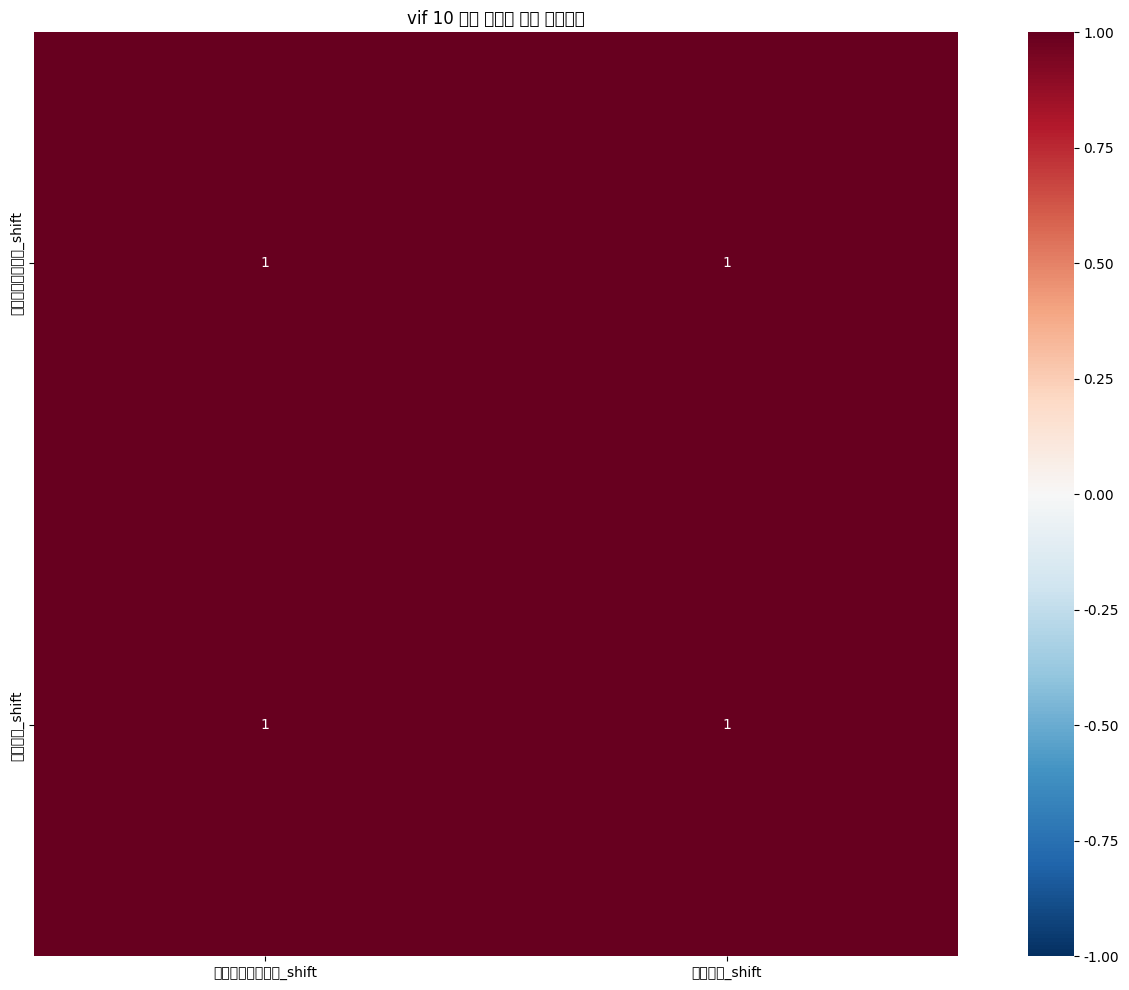

In [ ]:
import seaborn as sns
plt.figure(figsize=(18,12))
plt.title('vif 10 기준 선택된 피처 상관계수')
sns.heatmap(
    X_train_filtered_10.corr(), 
    annot=True, square=True, cmap='RdBu_r',
    vmin=-1, vmax=1
)
plt.show()

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

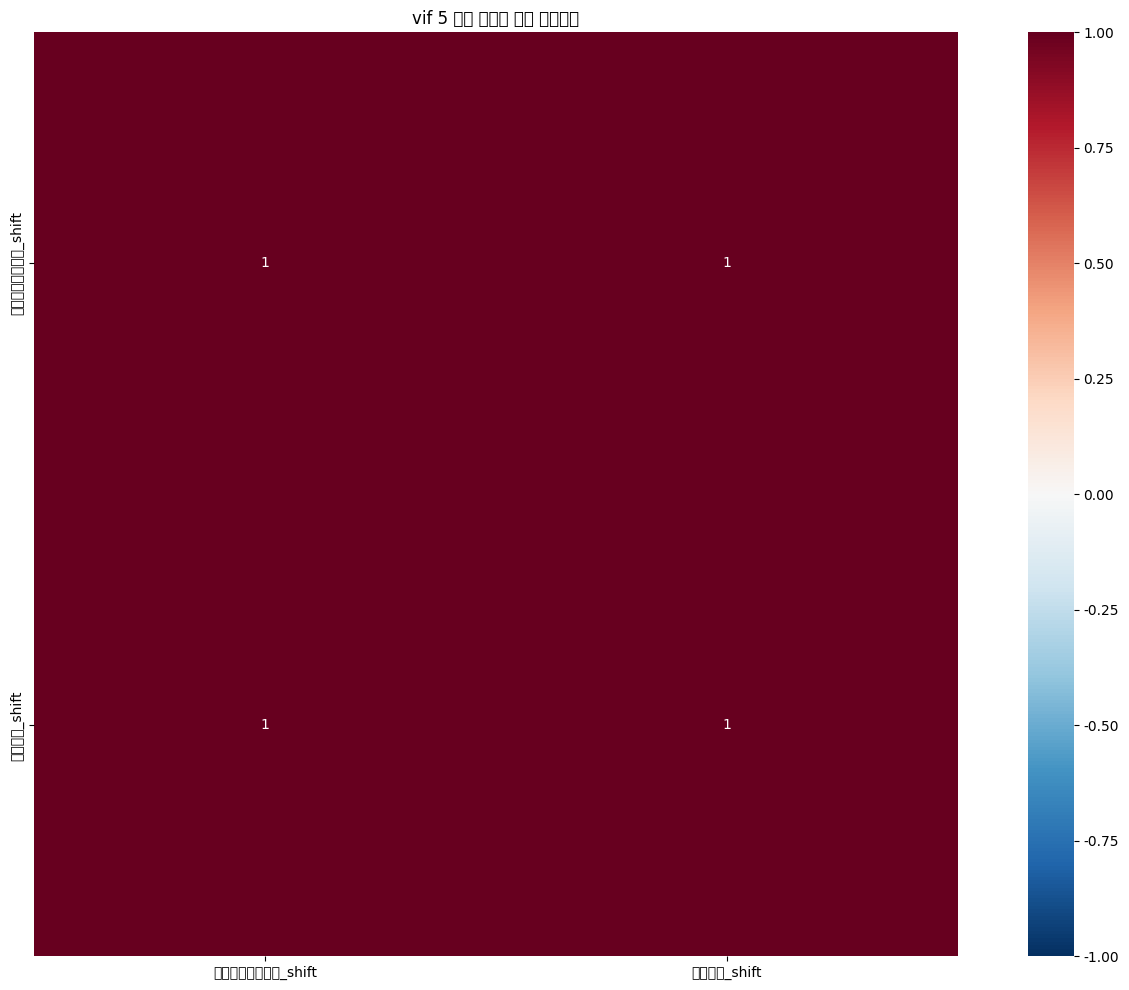

In [ ]:
import seaborn as sns
plt.figure(figsize=(18,12))
plt.title('vif 5 기준 선택된 피처 상관계수')
sns.heatmap(
    X_train_filtered_5.corr(), 
    annot=True, square=True, cmap='RdBu_r',
    vmin=-1, vmax=1
)
plt.show()

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

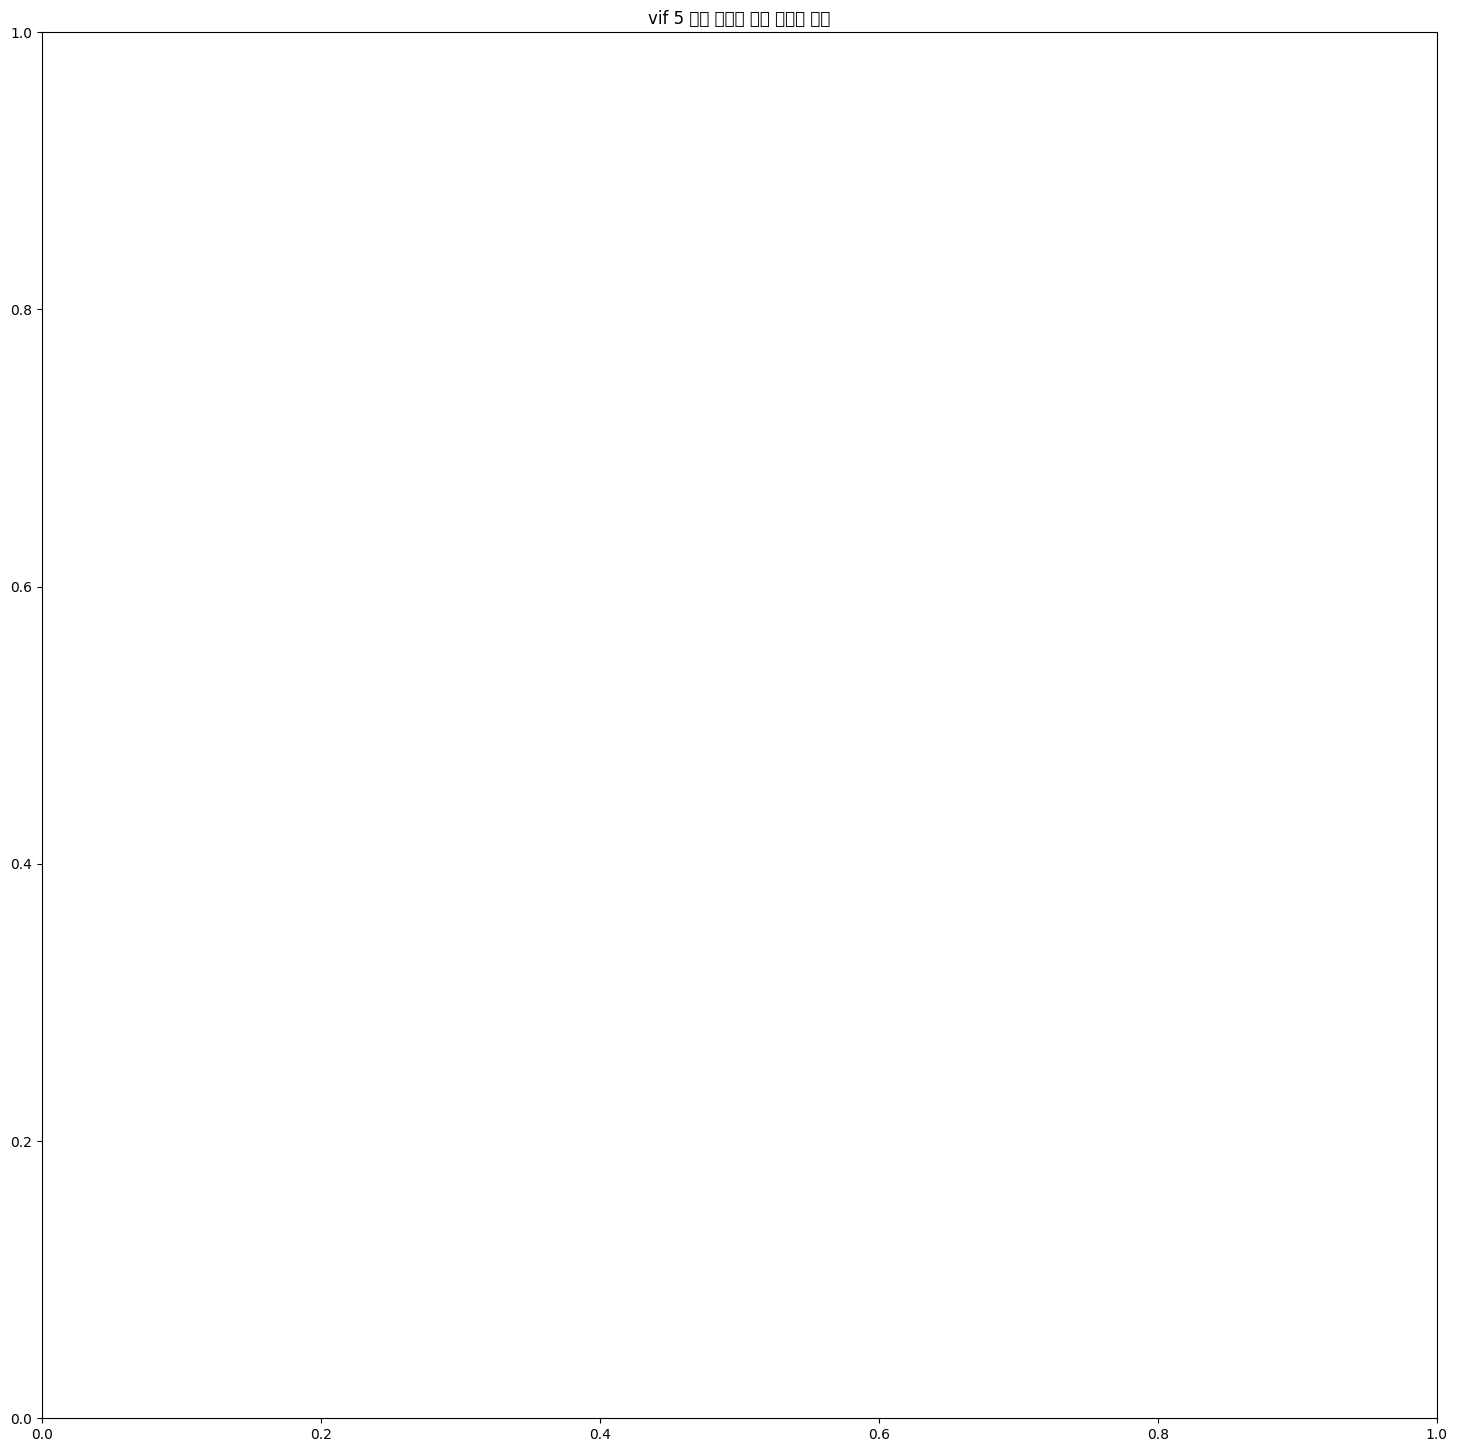

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

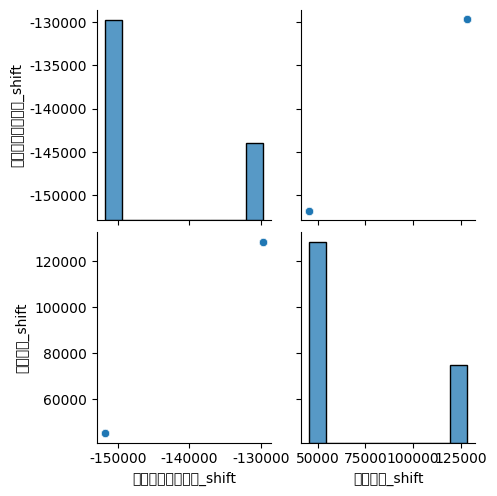

In [ ]:
plt.figure(figsize=(18, 18))
plt.title("vif 5 기준 선택된 피처 산점도 행렬")
sns.pairplot(X_train_filtered_5)
plt.show()

In [ ]:
# # vif 5 기준 선택된 피처(30개) 중 forward, backward, stepwise 모두 만족하는 피처

# features_lr.loc[features_vif_5].sort_values('Total', ascending=False)

In [ ]:
# X_train_final = X_train_filtered_5
# y_train_final = y_train

# X_test_final = X_test[X_train_final.columns]
# y_test_final = y_test

# X_train_final.shape, X_test_final.shape, y_train_final.shape, y_test_final.shape

In [ ]:
# features_final = ['cpi_jap(%)_shift',
#  '홍콩CPI_shift_diff()_diff',
#  '홍콩수입액_shift_diff',
#  '홍콩외환보유액_diff',
#  'Brent_diff',
#  '홍콩직접투자(%)_shift',
#  '홍콩수출액_shift_diff_diff',
#  'cpi_kor(%)_shift',
#  '홍콩CPI_shift_diff()',
#  'Brent_std',
#  'cpi_ind(%)_shift',
#  '홍콩 M2 (2).1(%)_shift_diff',
#  '국채 수익률_std',
#  'CLI_FRA_dummy_diff',
#  '홍콩수입액_diff',
#  '국채 수익률증감_diff',
#  'Dubai(%)_diff',
#  '홍콩외환보유액(%)_diff',
#  'Brent(%)_diff',
#  'msci_China(USD)(%)_diff',
#  '국채 수익률증감',
#  'Oman(%)',
#  'WTI(%)',
#  '녹인비율_전(%)',
#  '녹인대비상환수준(%)',
#  '예금금리_hk_std',
#  '상환비율(%)',
#  '상환조건감소량(%)_prev',
#  '변동_diff',
#  '기초자산개수']

In [360]:
features_final = ['환매대비상환수준(%)_next', '홍콩 M1 자국통화_shift_diff']

In [361]:
X_train = X_train_scaled[features_final]
X_test = X_test_scaled[features_final]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((212, 2), (54, 2), (212,), (54,))

In [362]:
y_train.mean()

0.3490566037735849

In [363]:
y_test.mean()

0.35185185185185186

In [364]:
from imblearn.over_sampling import SMOTE

# SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [365]:
y_train.value_counts()

label
0    138
1     74
Name: count, dtype: int64

In [366]:
y_resampled.value_counts()

label
0    138
1    138
Name: count, dtype: int64

In [367]:
X_train, y_train = X_resampled, y_resampled

In [368]:
y_test.value_counts()

label
0    35
1    19
Name: count, dtype: int64

In [284]:
# X = X[['cpi_jap(%)_shift',
#  '홍콩CPI_shift_diff()_diff',
#  '홍콩수입액_shift_diff',
#  '홍콩외환보유액_diff',
#  'Brent_diff',
#  '홍콩직접투자(%)_shift',
#  '홍콩수출액_shift_diff_diff',
#  'cpi_kor(%)_shift',
#  '홍콩CPI_shift_diff()',
#  'Brent_std',
#  'cpi_ind(%)_shift',
#  '홍콩 M2 (2).1(%)_shift_diff',
#  '국채 수익률_std',
#  'CLI_FRA_dummy_diff',
#  '홍콩수입액_diff',
#  '국채 수익률증감_diff',
#  'Dubai(%)_diff',
#  '홍콩외환보유액(%)_diff',
#  'Brent(%)_diff',
#  'msci_China(USD)(%)_diff',
#  '국채 수익률증감',
#  'Oman(%)',
#  'WTI(%)',
#  '녹인비율_전(%)',
#  '녹인대비상환수준(%)',
#  '예금금리_hk_std',
#  '상환비율(%)',
#  '상환조건감소량(%)_prev',
#  '변동_diff',
#  '기초자산개수']]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

In [369]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능평가
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

print("Accuracy : %.3f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))
print("roc_auc : %.3f" % roc_auc_score(y_test, y_pred))


[[35  0]
 [19  0]]
Accuracy : 0.648
Precision : 0.000
Recall : 0.000
F1 : 0.000
roc_auc : 0.500


In [370]:
X_val  =X_test
y_val = y_test

In [371]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_val)

# 모델 성능평가
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))
print("roc_auc : %.3f" % roc_auc_score(y_val, y_pred))



[[35  0]
 [19  0]]
Accuracy : 0.648
Precision : 0.000
Recall : 0.000
F1 : 0.000
roc_auc : 0.500


In [372]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

# fit
dt.fit(X_train, y_train)

# 예측
y_pred = dt.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))
print("roc_auc : %.3f" % roc_auc_score(y_val, y_pred))


[[34  1]
 [ 0 19]]
Accuracy : 0.981
Precision : 0.950
Recall : 1.000
F1 : 0.974
roc_auc : 0.986


In [373]:
from sklearn.svm import SVC
svc = SVC(random_state=0, probability=True)

# fit
svc.fit(X_train, y_train)

# 예측
y_pred = svc.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))
print("roc_auc : %.3f" % roc_auc_score(y_val, y_pred))


[[28  7]
 [14  5]]
Accuracy : 0.611
Precision : 0.417
Recall : 0.263
F1 : 0.323
roc_auc : 0.532


In [374]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

# fit
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))
print("roc_auc : %.3f" % roc_auc_score(y_val, y_pred))


[[34  1]
 [ 0 19]]
Accuracy : 0.981
Precision : 0.950
Recall : 1.000
F1 : 0.974
roc_auc : 0.986


In [375]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()

# fit
xgb_model.fit(X_train, y_train)

# 예측
y_pred = xgb_model.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))
print("roc_auc : %.3f" % roc_auc_score(y_val, y_pred))



[[34  1]
 [ 0 19]]
Accuracy : 0.981
Precision : 0.950
Recall : 1.000
F1 : 0.974
roc_auc : 0.986


In [329]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier()

# fit
lgbm_model.fit(X_train, y_train)

# 예측
y_pred = lgbm_model.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))
print("roc_auc : %.3f" % roc_auc_score(y_val, y_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 74, number of negative: 138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 57
[LightGBM] [Info] Number of data points in the train set: 212, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349057 -> initscore=-0.623189
[LightGBM] [Info] Start training from score -0.623189
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [376]:
def model_basic(X_train, y_train, X_test, y_test):
    models = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        SVC(),
        RandomForestClassifier(),
        XGBClassifier(),
        LGBMClassifier()
    ]

    rdict={'model':[],'accuracy':[],'precision':[],'recall':[],'f1_score':[]}

    
    for clf in models:
        clf = clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        # results = (round(accuracy_score(y_test, pred),2),
        #             round(precision_score(y_test, pred),2),
        #             round(recall_score(y_test, pred),2),
        #             round(f1_score(y_test, pred),2))

        results = (
            accuracy_score(y_test, pred),
            precision_score(y_test, pred),
            recall_score(y_test, pred),
            f1_score(y_test, pred),

        )

        
        rdict['model'].append(clf); 
        rdict['accuracy'].append(results[0])
        rdict['precision'].append(results[1])
        rdict['recall'].append(results[2])
        rdict['f1_score'].append(results[3])



        # print(results)

    rdf = pd.DataFrame(data=rdict)
    return rdf 

In [377]:
# train
model_basic(X_train, y_train, X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 138, number of negative: 138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 276, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

,model,accuracy,precision,recall,f1_score
0,LogisticRegression(),0.50000,0.00000,0.00000,0.00000
1,DecisionTreeClassifier(),0.99638,1.00000,0.99275,0.99636
2,SVC(),0.50725,0.51282,0.28986,0.37037
3,"(DecisionTreeClassifier(max_features='sqrt', r...",0.99638,1.00000,0.99275,0.99636
4,"XGBClassifier(base_score=None, booster=None, c...",0.99275,1.00000,0.98551,0.99270
5,LGBMClassifier(),0.96377,0.98485,0.94203,0.96296


In [296]:

# test
model_basic(X_train, y_train, X_val, y_val)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 138, number of negative: 138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 276, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

,model,accuracy,precision,recall,f1_score
0,LogisticRegression(),0.64815,0.00000,0.00000,0.00000
1,DecisionTreeClassifier(),0.98148,0.95000,1.00000,0.97436
2,SVC(),0.61111,0.41667,0.26316,0.32258
3,"(DecisionTreeClassifier(max_features='sqrt', r...",0.98148,0.95000,1.00000,0.97436
4,"XGBClassifier(base_score=None, booster=None, c...",0.98148,0.95000,1.00000,0.97436
5,LGBMClassifier(),0.98148,0.95000,1.00000,0.97436


#### 2021 테스트셋

In [ ]:
# test 2021
len(features_final)

In [ ]:
# fname = '../datasets/dataset_final_240201.csv'

# ELS + 장단기, 2021년
fname = 'dataset_final_240202.csv'

data = pd.read_csv(fname, index_col=0)
data.shape

In [ ]:
dataset = data

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(dataset['환매일종가위치'])
dataset['환매일종가위치_code'] = encoder.transform(
    dataset['환매일종가위치']
    )
dataset['환매일종가위치_code'] = dataset['환매일종가위치'].astype('category').cat.codes.astype(float)


In [ ]:
cols_pct = [
    '녹인비율', '녹인비율_전', 'H총증감률', 'H평균증감률', 'H일평균증감률', 'H이전대비증감률', '상환비율'
]
# 비율 단위 변경
for col in cols_pct:
    col_new = col+"(%)"
    dataset[col_new] = dataset[col]*100

In [ ]:
len(features_final)

In [ ]:
[col for col in features_final if col not in dataset.columns]

In [ ]:
dataset.isna().sum()

In [ ]:
dataset[features_final]

In [ ]:
def scaling(X_train, X_test, cols_cont, method = 'standard'):
    X_train = X_train.copy()
    X_test = X_test.copy()

    if method=='standard':
        scaler = StandardScaler()
    elif method=='robust':
        scaler = RobustScaler()

    scaler.fit(X_train[cols_cont])
    X_train_scaled = scaler.transform(X_train[cols_cont])
    X_train.loc[:, cols_cont] = X_train_scaled # scaling 변수로 대체
    X_test_scaled = scaler.transform(X_test[cols_cont])
    X_test.loc[:, cols_cont] = X_test_scaled
    
    return X_train, X_test

## 모델링

In [ ]:
features_vif_5

In [ ]:
features_vif_5_cont = [col for col in cols_cont if col in features_vif_5]
features_vif_5_cate = [col for col in features_vif_5 if col not in features_vif_5_cont]

In [ ]:
features_vif_5_cate

In [378]:
from ml import models
from ml import model_selection

methods = ['lr', 'dt', 'svc', 'rf', 'xgb', 'lgbm']
results = dict()
for method in methods:
    results[method] = dict()
    stat, model = models.get_model(method)
    if not stat:
        print('method')
        continue
    res = model_selection.stkfold(
        X_train, y_train, model
    )

    model.fit(X_train, y_train)
    results[method]['model'] = model

    results[method]['res_train_test'] = model_selection.test(
        model, 
        X_train, X_test, y_train, y_test,
        1
    )

    results[method]['res_stkfold'] = res

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 110, number of negative: 110
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 220, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

In [379]:
results.keys()

dict_keys(['lr', 'dt', 'svc', 'rf', 'xgb', 'lgbm'])

In [380]:
results['lr'].keys()

dict_keys(['model', 'res_train_test', 'res_stkfold'])

In [381]:
# for method in methods:
results['xgb']['res_train_test']

,accuracy,precision,recall,f1,roc_auc,data,n_iter
0,0.99275,1.00000,0.98551,0.99270,0.99806,train,1
0,0.98148,0.95000,1.00000,0.97436,1.00000,test,1


In [382]:
results['lr']['res_train_test']

,accuracy,precision,recall,f1,roc_auc,data,n_iter
0,0.50000,0.00000,0.00000,0.00000,0.75704,train,1
0,0.64815,0.00000,0.00000,0.00000,0.81955,test,1


In [383]:
results['dt']['res_train_test']


,accuracy,precision,recall,f1,roc_auc,data,n_iter
0,0.99638,1.00000,0.99275,0.99636,0.99989,train,1
0,0.98148,0.95000,1.00000,0.97436,0.98571,test,1


In [384]:
results['svc']['res_train_test']


,accuracy,precision,recall,f1,roc_auc,data,n_iter
0,0.50725,0.51282,0.28986,0.37037,0.24296,train,1
0,0.61111,0.41667,0.26316,0.32258,0.18045,test,1


In [385]:
results['lgbm']['res_train_test']


,accuracy,precision,recall,f1,roc_auc,data,n_iter
0,0.96377,0.98485,0.94203,0.96296,0.99583,train,1
0,0.98148,0.95000,1.00000,0.97436,1.00000,test,1


In [386]:
results['rf']['res_train_test']


,accuracy,precision,recall,f1,roc_auc,data,n_iter
0,0.99638,1.00000,0.99275,0.99636,0.99953,train,1
0,0.98148,0.95000,1.00000,0.97436,1.00000,test,1
